# COVID-19 WORLD VACCINATION PROGRESS-EDA


![](https://www.emeraldgrouppublishing.com/sites/default/files/image/covid-cells.jpg)


# Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections

# IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os
import re
import time
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")

# INFORMATION ABOUT DATASET

In [3]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [4]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,9.437000e+03,8.754000e+03,6.502000e+03,7.928000e+03,1.546500e+04,9437.000000,8754.000000,6502.000000,15465.000000
mean,5.250013e+06,3.302754e+06,1.672178e+06,1.371965e+05,7.948445e+04,16.130694,11.678865,5.945094,3007.500873
std,2.163269e+07,1.233716e+07,7.225403e+06,5.294140e+05,3.641596e+05,23.841769,15.622004,10.306655,4693.064582
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.306400e+04,5.403675e+04,2.461400e+04,3.071750e+03,9.100000e+02,1.400000,1.312500,0.660000,356.000000
50%,4.462850e+05,3.398010e+05,1.818105e+05,1.613000e+04,6.495000e+03,6.650000,5.130000,2.480000,1504.000000
75%,2.003211e+06,1.387596e+06,7.228470e+05,6.386600e+04,3.003600e+04,20.850000,15.510000,6.760000,4020.000000
max,2.977340e+08,1.494623e+08,1.089266e+08,1.160100e+07,7.205286e+06,215.710000,112.750000,102.950000,118759.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15666 entries, 0 to 15665
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              15666 non-null  object 
 1   iso_code                             15666 non-null  object 
 2   date                                 15666 non-null  object 
 3   total_vaccinations                   9437 non-null   float64
 4   people_vaccinated                    8754 non-null   float64
 5   people_fully_vaccinated              6502 non-null   float64
 6   daily_vaccinations_raw               7928 non-null   float64
 7   daily_vaccinations                   15465 non-null  float64
 8   total_vaccinations_per_hundred       9437 non-null   float64
 9   people_vaccinated_per_hundred        8754 non-null   float64
 10  people_fully_vaccinated_per_hundred  6502 non-null   float64
 11  daily_vaccinations_per_milli

In [6]:
df.shape

(15666, 15)

In [7]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [8]:
df.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     6229
people_vaccinated                      6912
people_fully_vaccinated                9164
daily_vaccinations_raw                 7738
daily_vaccinations                      201
total_vaccinations_per_hundred         6229
people_vaccinated_per_hundred          6912
people_fully_vaccinated_per_hundred    9164
daily_vaccinations_per_million          201
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [9]:
#converting date column datatype to date
df["date"]= pd.to_datetime(df.date)

In [10]:
df["Total_vaccinations(count)"]= df.groupby("country").total_vaccinations.tail(1)

In [11]:
#Top countries with most vaccinations
df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
China                   297734000.0
United States           251973752.0
India                   162603603.0
United Kingdom           51225890.0
Brazil                   46542392.0
England                  42864836.0
Germany                  33565445.0
Turkey                   24467719.0
France                   23949989.0
Italy                    22644364.0
Indonesia                21367754.0
Russia                   21177713.0
Mexico                   19951121.0
Spain                    18489580.0
Chile                    15296805.0
Canada                   14924694.0
Poland                   13034348.0
United Arab Emirates     10907264.0
Israel                   10489167.0
Saudi Arabia             10065924.0
Name: Total_vaccinations(count), dtype: float64

# VISUALIZATION

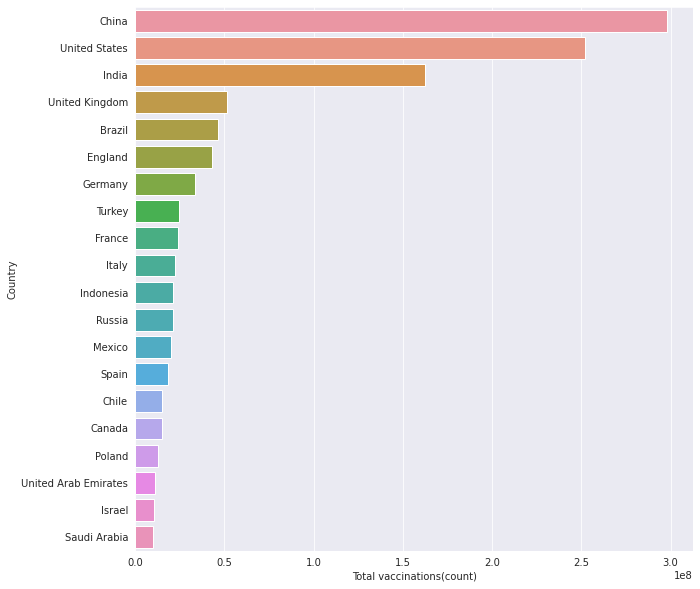

In [12]:
#barplot visualization of top countries with most vaccinations
x= df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("darkgrid")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Total vaccinations(count)")
ax.set_ylabel("Country")
plt.show()

In [13]:
#Top countries with fully  vaccinated peoples
df["Full_vaccinations(count)"]= df.groupby("country").people_fully_vaccinated.tail(1)

df.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
United States     108926627.0
India              31544713.0
United Kingdom     16291719.0
Brazil             15037978.0
England            13632735.0
Turkey             10076124.0
Mexico              8790655.0
Indonesia           8339055.0
Russia              8284150.0
Germany             7360108.0
France              7238601.0
Chile               6993123.0
Italy               6877239.0
Spain               5696827.0
Israel              5071821.0
Morocco             4346867.0
Poland              3451651.0
Bangladesh          3313424.0
Hungary             2315428.0
Romania             2138703.0
Name: Full_vaccinations(count), dtype: float64

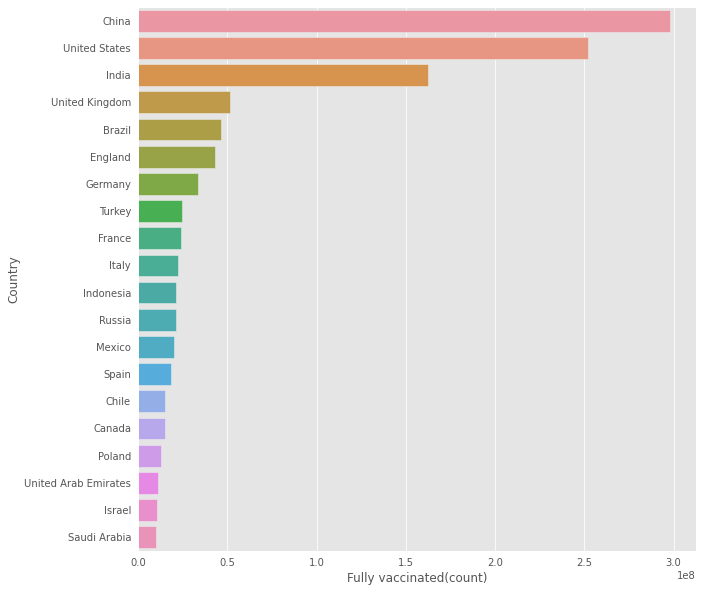

In [14]:
#barplot visualization of top countries with most full vaccinations

plt.style.use("ggplot")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Fully vaccinated(count)")
ax.set_ylabel("Country")
plt.show()

In [15]:
#Vaccine types
x=df.vaccines.unique()
y= list(x)
for i in y: print(i)

Oxford/AstraZeneca
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Pfizer/BioNTech
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Sinovac
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac
Sinopharm/Beijing
Pfizer/BioNTech, Sinovac
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
Sinopharm/Beijing, Sputnik V
Moderna, Pfizer/BioNTech
Oxford/AstraZeneca, Sinopharm/Beijing
Moderna, Oxford/AstraZeneca
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Covaxin, Oxford/AstraZeneca
Pfizer/BioNTech, Sinopharm/Beijing
Oxford/AstraZeneca, Sputnik V
Oxford/AstraZeneca, Sinovac, Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinova

In [16]:
#most common vaccines
df.vaccines.value_counts()

Oxford/AstraZeneca                                                                    2607
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          2389
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         1532
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1418
Pfizer/BioNTech                                                                       1227
Moderna, Pfizer/BioNTech                                                               604
Oxford/AstraZeneca, Sinopharm/Beijing                                                  587
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                           499
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      487
Oxford/AstraZeneca, Sinovac                                                            472
Sputnik V                                                                              438

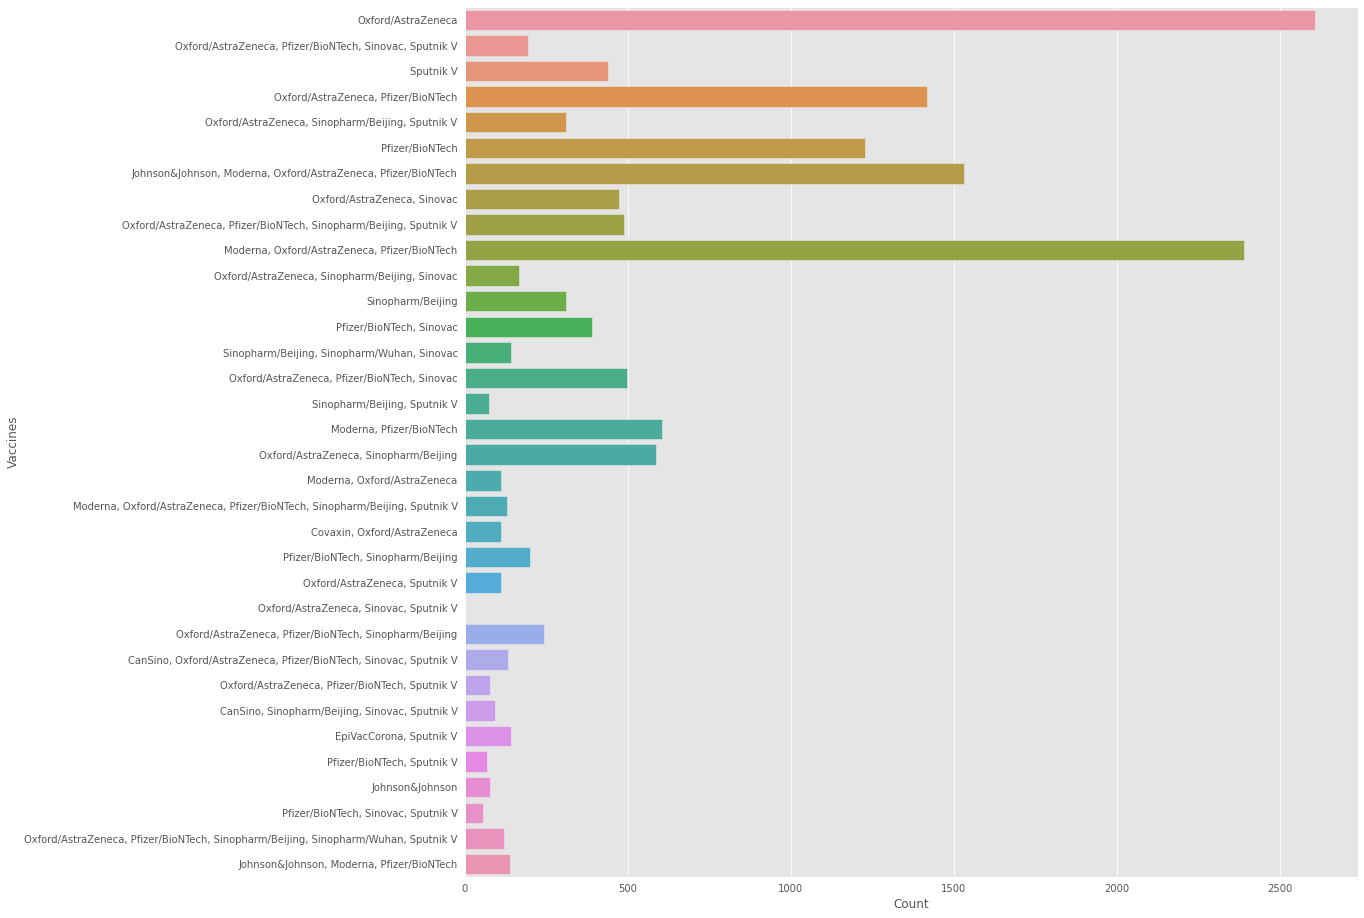

In [17]:
plt.figure(figsize=(16,16))
sns.countplot(y= "vaccines",data= df)
plt.ylabel("Vaccines")
plt.xlabel("Count")
plt.show()

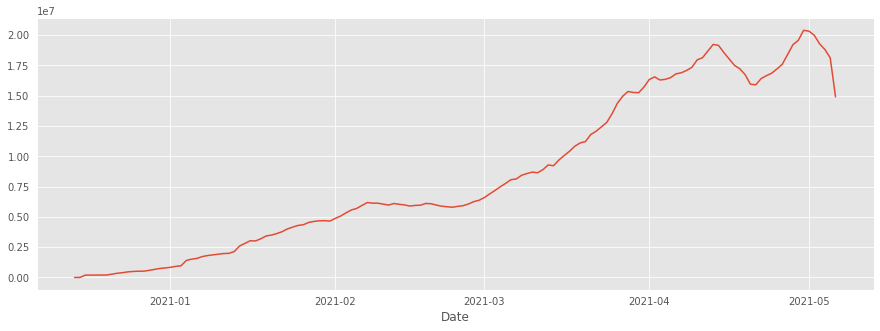

In [18]:
#daily vaccinations
x= df.groupby("date").daily_vaccinations.sum()
plt.style.use("ggplot")
plt.figure(figsize= (15,5))
sns.lineplot(x.index,x.values)
plt.xlabel("Date")
plt.show()

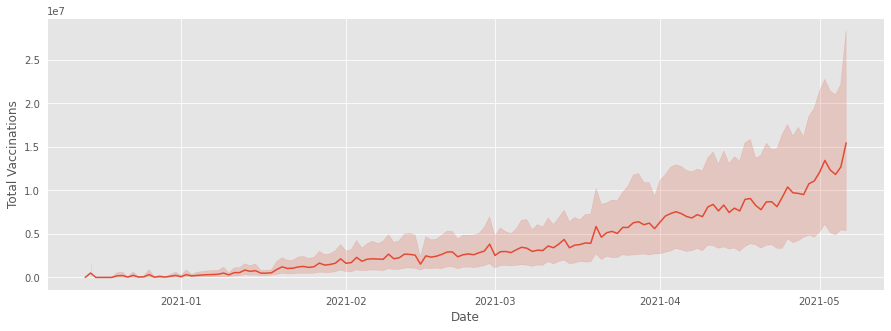

In [19]:
#total vaccinations
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations",data= df)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.show()

In [20]:
#Countries with best daily average vaccinations
x= df.groupby("country").daily_vaccinations.mean().sort_values(ascending= False).head(20)
x

country
China                   1.967914e+06
United States           1.797949e+06
India                   1.415083e+06
Brazil                  4.039067e+05
United Kingdom          4.030684e+05
England                 3.374548e+05
Germany                 2.405043e+05
Turkey                  2.142351e+05
Indonesia               1.806771e+05
France                  1.758894e+05
Italy                   1.637742e+05
Spain                   1.432856e+05
Russia                  1.427438e+05
Mexico                  1.414828e+05
Chile                   1.134693e+05
Canada                  9.866457e+04
Morocco                 9.846453e+04
Poland                  9.486021e+04
Bangladesh              8.869666e+04
United Arab Emirates    8.245660e+04
Name: daily_vaccinations, dtype: float64

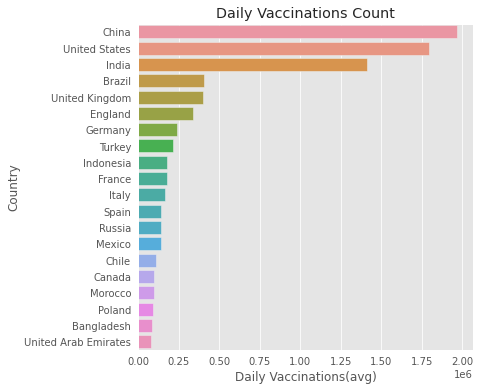

In [21]:
#daily vaccinations barplot
plt.figure(figsize= (6,6))
ax= sns.barplot(x.values,x.index)
ax.set_title("Daily Vaccinations Count")
ax.set_xlabel("Daily Vaccinations(avg)")
ax.set_ylabel("Country")
plt.show()

In [22]:
#vaccination per hundred top countries
df["Total_vaccinations_per_hundred"]= df.groupby("country").total_vaccinations_per_hundred.tail(1)

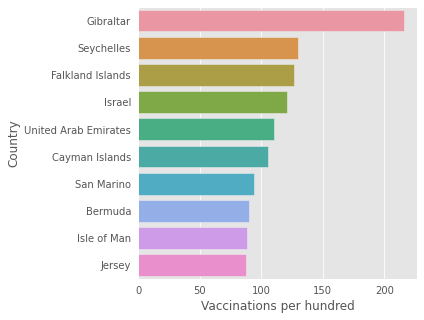

In [23]:
x= df.groupby("country")["Total_vaccinations_per_hundred"].mean().sort_values(ascending= False).head(10)
plt.figure(figsize= (5,5))
ax= sns.barplot(x.values,x.index)
ax.set_ylabel("Country")
ax.set_xlabel("Vaccinations per hundred")
plt.show()

In [24]:
#daily vaccinations per million top countries
df.groupby("country")["daily_vaccinations_per_million"].mean().sort_values(ascending= False).head(20)

country
Bhutan                      23441.390244
Falkland Islands            21459.424242
Gibraltar                   18955.775862
Aruba                       13863.368421
Curacao                     13503.473684
San Marino                  13471.880597
Seychelles                  11437.149123
Saint Helena                11408.723077
Nauru                       10891.857143
Israel                       8818.528986
Bermuda                      8364.273585
United Arab Emirates         8337.016529
Maldives                     8261.815217
Uruguay                      8073.338235
Cayman Islands               7975.923077
Isle of Man                  7865.676190
Jersey                       7676.173469
Turks and Caicos Islands     7333.714286
Malta                        7046.185185
Guernsey                     6793.430233
Name: daily_vaccinations_per_million, dtype: float64

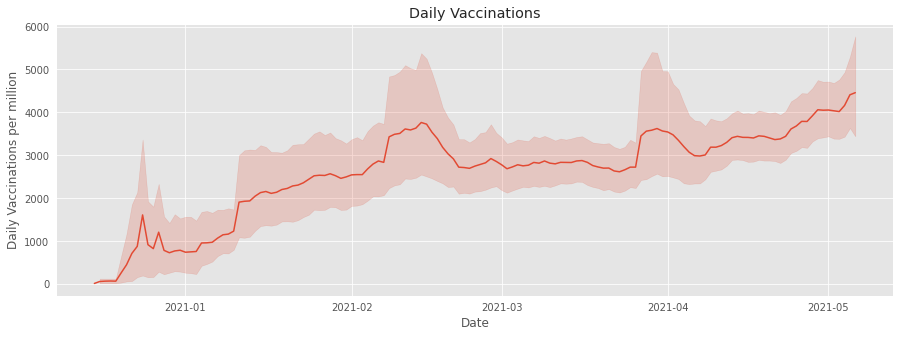

In [25]:
#daily vaccination per million 
plt.figure(figsize= (15,5))
plt.style.use("ggplot")
sns.lineplot(x= "date",y= "daily_vaccinations_per_million",data= df)
plt.title("Daily Vaccinations")
plt.ylabel("Daily Vaccinations per million")
plt.xlabel("Date")
plt.show()

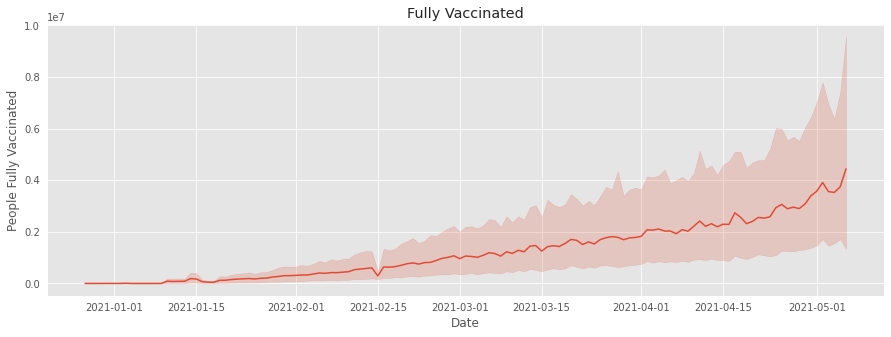

In [26]:
#people fully vaccinated
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated",data= df)
plt.title("Fully Vaccinated")
plt.xlabel("Date")
plt.ylabel("People Fully Vaccinated")
plt.show()

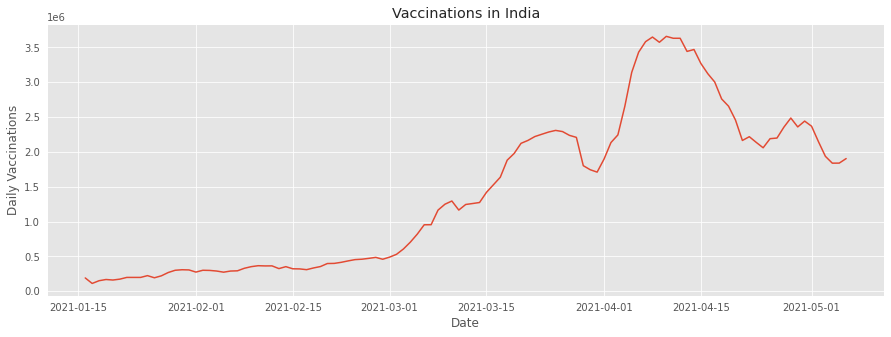

In [27]:
#daily vaccinations in India
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.title("Vaccinations in India")
sns.lineplot(x= "date",y= "daily_vaccinations",data= df[df.country== "India"])
plt.show()

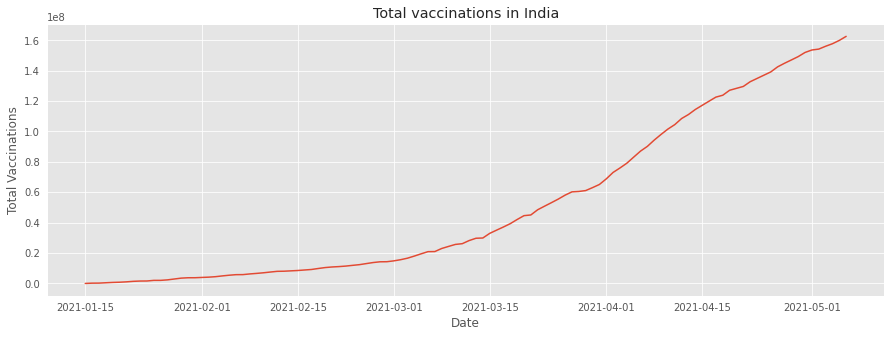

In [28]:
#Total vaccinations in India
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Total vaccinations in India")
sns.lineplot(x= "date",y= "total_vaccinations",data= df[df["country"]=="India"])
plt.show()

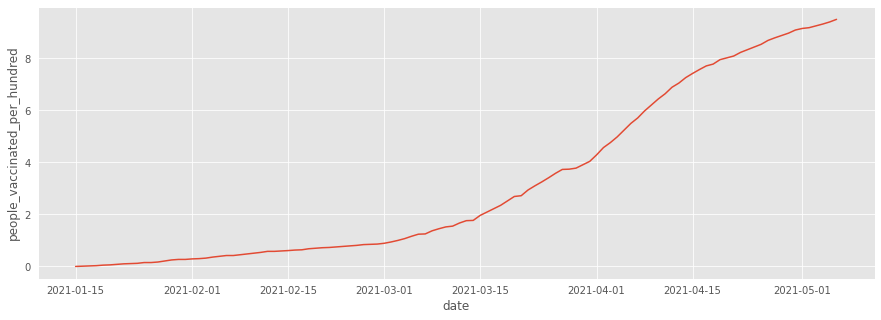

In [29]:
#people_vaccinated per hundred in India
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_vaccinated_per_hundred",data= df[df["country"]=="India"])
plt.show()

In [30]:
#preferred vaccine in India
x= df[df["country"]=="India"]
z= x.vaccines.value_counts()
c= list(z.index)
c

['Covaxin, Oxford/AstraZeneca']

In [31]:
df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(10)

country
China             297734000.0
United States     251973752.0
India             162603603.0
United Kingdom     51225890.0
Brazil             46542392.0
England            42864836.0
Germany            33565445.0
Turkey             24467719.0
France             23949989.0
Italy              22644364.0
Name: Total_vaccinations(count), dtype: float64

In [32]:
#creating dataframe for top 5 vaccinated countries
x= df.loc[(df.country== "United States") | (df.country== "China")| (df.country== "India")| (df.country== "Unted Kingdom")|(df.country== "England")]

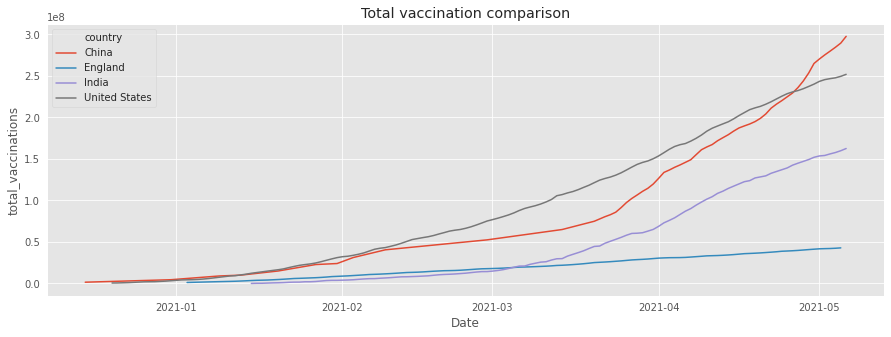

In [33]:
#total vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= x,hue= "country")
plt.xlabel("Date")
plt.title("Total vaccination comparison")
plt.show()

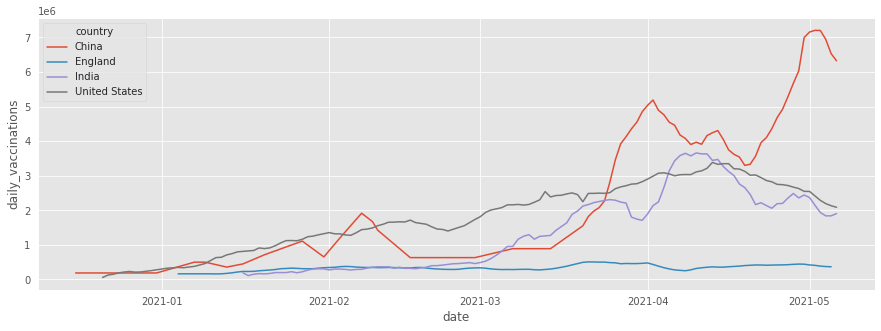

In [34]:
#daily vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations" ,data= x,hue= "country")
plt.show()

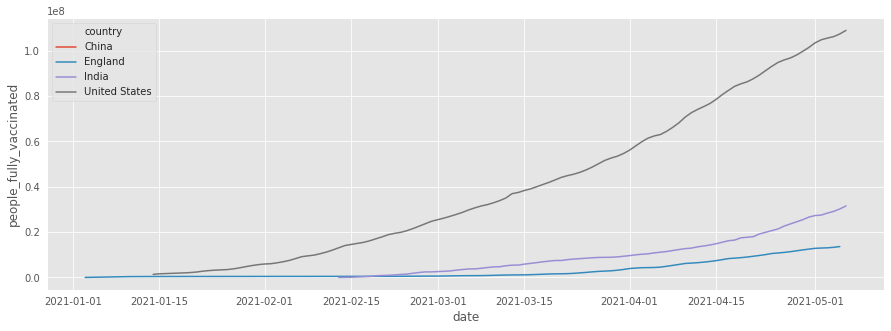

In [35]:
#full vaccinations comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated" ,data= x,hue= "country")
plt.show()

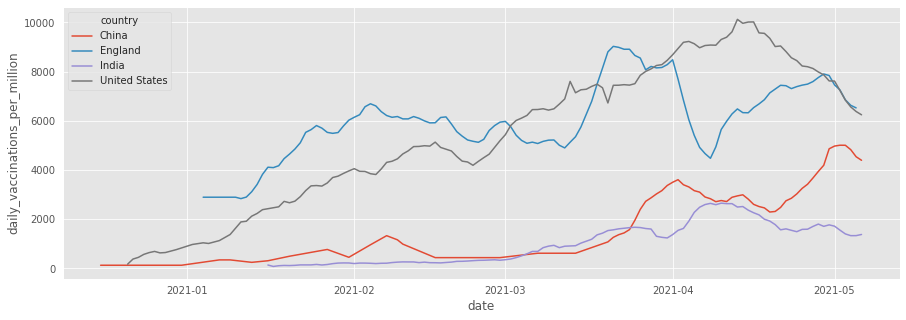

In [36]:
#daily vaccination per million comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations_per_million" ,data= x,hue= "country")
plt.show()

# IF YOU HAVE ANY QUESTIONS RELATED TO THIS THEN COMMENT DOWN 

# STAY SAFE 
# THANK YOUUU......